
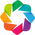

In [1]:
import holoviews as hv
hv.extension('bokeh')

In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0,'../')

from IPython.core.debugger import set_trace

In [40]:
%%opts Curve Scatter [width=600,height=400] Layout [shared_axes=False] Scatter (size=10,alpha=0.5)
%%opts Overlay [legend_position='bottom_right']


r = sys.domain.r
U = typyPRISM.potential.HardCoreLennardJones(sigma=1.0,epsilon=+0.5).calculate(r)
c1 = hv.Curve((r,U),extents=(0,None,5,1))
c2 = hv.Scatter((r,U),extents=(0,None,5,1))
hv.Overlay([c1,c2])


:Overlay
   .Curve.I   :Curve   [x]   (y)
   .Scatter.I :Scatter   [x]   (y)

In [4]:
import typyPRISM
from typyPRISM.calculate.prism.pair_correlation import pair_correlation
import numpy as np

eta = 0.45
v1 = 4.0/3.0 * np.pi * (0.5)**(3)
phi = 0.5
rho1 = phi*eta/v1
rho2 = (1-phi)*eta/v1

sys = typyPRISM.System(['A','B'],kT=1.0)
sys.domain = typyPRISM.Domain(dr=0.1,length=1024)

sys.density['A'] = rho1
sys.density['B'] = rho2


sys.potential['A','A'] = typyPRISM.potential.HardSphere(sigma=1.0)
sys.potential['B','B'] = typyPRISM.potential.HardSphere(sigma=1.0)
sys.potential['A','B'] = typyPRISM.potential.HardSphere(sigma=1.0)

sys.closure[sys.types,sys.types] = typyPRISM.closure.PercusYevick()

guess = np.zeros(sys.rank*sys.rank*sys.domain.length)
for length in [10000,2000,500]:
    sys.omega[sys.types,sys.types] = typyPRISM.omega.Gaussian(sigma=1.0,length=length)
    
    PRISM = sys.createPRISM()
    
    result = PRISM.solve(guess)
    
    guess = np.copy(PRISM.x)

guess_eps0_N500 = guess


0:  |F(x)| = 87.1908; step 0.00105311; tol 0.89806
1:  |F(x)| = 72.5886; step 0.172843; tol 0.72586
2:  |F(x)| = 67.012; step 0.140107; tol 0.767027
3:  |F(x)| = 66.561; step 0.392458; tol 0.887929
4:  |F(x)| = 66.5607; step 1; tol 0.89999
5:  |F(x)| = 66.5605; step 1; tol 0.899996
6:  |F(x)| = 66.5604; step 1; tol 0.899998
7:  |F(x)| = 66.5605; step 1; tol 0.9
8:  |F(x)| = 66.5604; step 1; tol 0.9
9:  |F(x)| = 66.5604; step 1; tol 0.9
10:  |F(x)| = 66.5662; step 1; tol 0.900155
11:  |F(x)| = 66.5662; step 1; tol 0.899999
12:  |F(x)| = 66.5723; step 1; tol 0.900166
13:  |F(x)| = 66.5663; step 0.500047; tol 0.899838
14:  |F(x)| = 66.5662; step 1; tol 0.899996
15:  |F(x)| = 66.5663; step 1; tol 0.900004
16:  |F(x)| = 66.5764; step 1; tol 0.900272
17:  |F(x)| = 66.5703; step 1; tol 0.899837
18:  |F(x)| = 68.2579; step 1; tol 0.946209
19:  |F(x)| = 67.7019; step 0.163052; tol 0.885397
20:  |F(x)| = 67.0156; step 0.249879; tol 0.881846
21:  |F(x)| = 67.0132; step 0.500024; tol 0.899935
22: 

162:  |F(x)| = 1.69662; step 0.00513292; tol 0.892418
163:  |F(x)| = 1.68898; step 0.00661882; tol 0.891907
164:  |F(x)| = 1.67773; step 0.0127334; tol 0.88806
165:  |F(x)| = 1.66344; step 0.0199145; tol 0.884729
166:  |F(x)| = 1.64192; step 0.0424573; tol 0.876863
167:  |F(x)| = 1.63015; step 0.0153537; tol 0.887149
168:  |F(x)| = 1.59779; step 0.0849122; tol 0.864618
169:  |F(x)| = 1.56248; step 0.116641; tol 0.860658
170:  |F(x)| = 1.44917; step 1; tol 0.774202
171:  |F(x)| = 1.43587; step 0.0088438; tol 0.883555
172:  |F(x)| = 1.31191; step 1; tol 0.751317
173:  |F(x)| = 1.25899; step 0.11619; tol 0.828846
174:  |F(x)| = 1.15566; step 0.388037; tol 0.758329
175:  |F(x)| = 1.15215; step 0.0110407; tol 0.894552
176:  |F(x)| = 1.06995; step 0.45446; tol 0.776159
177:  |F(x)| = 1.05244; step 0.0343232; tol 0.870787
178:  |F(x)| = 1.03472; step 0.0358491; tol 0.869939
179:  |F(x)| = 1.01614; step 0.039311; tol 0.867975
180:  |F(x)| = 0.993882; step 0.0508722; tol 0.861001
181:  |F(x)| =

315:  |F(x)| = 0.0994325; step 0.0367559; tol 0.837396
316:  |F(x)| = 0.0958056; step 0.0382517; tol 0.83554
317:  |F(x)| = 0.0919873; step 0.0416252; tol 0.829691
318:  |F(x)| = 0.0880771; step 0.0445305; tol 0.825112
319:  |F(x)| = 0.0835112; step 0.0539911; tol 0.809107
320:  |F(x)| = 0.0778488; step 0.0700969; tol 0.78209
321:  |F(x)| = 0.072071; step 0.0788603; tol 0.771364
322:  |F(x)| = 0.065085; step 0.104045; tol 0.733979
323:  |F(x)| = 0.0569568; step 0.134681; tol 0.689241
324:  |F(x)| = 0.0475754; step 0.186196; tol 0.627937
325:  |F(x)| = 0.0359059; step 0.296854; tol 0.512636
326:  |F(x)| = 0.0285641; step 0.304277; tol 0.569578
327:  |F(x)| = 0.0153728; step 1; tol 0.291978
328:  |F(x)| = 0.000795635; step 1; tol 0.00241082
329:  |F(x)| = 0.000226859; step 1; tol 0.073169
0:  |F(x)| = 0.216225; step 1; tol 2.58125e-05
1:  |F(x)| = 0.000824903; step 1; tol 1.3099e-05
2:  |F(x)| = 5.79879e-09; step 1; tol 4.44745e-11
0:  |F(x)| = 0.422749; step 1; tol 0.000279311
1:  |F(x)

In [79]:
import typyPRISM
from typyPRISM.calculate.prism.chi import chi
import numpy as np

eta = 0.45
v1 = 4.0/3.0 * np.pi * (0.5)**(3)
phi = 0.5

sys = typyPRISM.System(['A','B'],kT=1.0)
sys.domain = typyPRISM.Domain(dr=0.1,length=1024)

sys.potential['A','A'] = typyPRISM.potential.HardSphere(sigma=1.0)
sys.potential['B','B'] = typyPRISM.potential.HardSphere(sigma=1.0)
sys.potential['A','B'] = typyPRISM.potential.HardCoreLennardJones(sigma=1.0,epsilon=+0.01)

sys.closure[sys.types,sys.types] = typyPRISM.closure.PercusYevick()
sys.omega[sys.types,sys.types] = typyPRISM.omega.Gaussian(sigma=1.0,length=500)

sys.density['A'] = phi*eta/v1
sys.density['B'] = (1-phi)*eta/v1

guess1 = np.copy(guess)
PRISM = sys.createPRISM()
result = PRISM.solve(guess1)
guess2 = np.copy(PRISM.x)

chi_values = []

# guess1 = np.copy(guess)
# for phi in np.arange(0.5,0.1,-0.05):
#     sys.density['A'] = phi*eta/v1
#     sys.density['B'] = (1-phi)*eta/v1
#     
#     print('==> Solving for...')
#     print('==> phi={}'.format(phi))
#     print('==> rhoA={}'.format(sys.density['A']))
#     print('==> rhoB={}'.format(sys.density['B']))
# 
#     PRISM = sys.createPRISM()
#     
#     result = PRISM.solve(guess1)
#     
#     c = chi(PRISM)[('A','B')][0]
#     chi_values.append([phi,c])
#     
#     guess1 = np.copy(PRISM.x)
#     
# chi_values = chi_values[::-1]
# guess1 = np.copy(guess)
# for phi in np.arange(0.5,0.9,0.05):
#     
#     sys.density['A'] = phi*eta/v1
#     sys.density['B'] = (1-phi)*eta/v1
#     
#     print('==> Solving for...')
#     print('==> phi={}'.format(phi))
#     print('==> rhoA={}'.format(sys.density['A']))
#     print('==> rhoB={}'.format(sys.density['B']))
# 
#     PRISM = sys.createPRISM()
#     
#     result = PRISM.solve(guess1)
#     
#     c = chi(PRISM)[('A','B')][0]
#     chi_values.append([phi,c])
#     
#     guess1 = np.copy(PRISM.x)
# 
# chi_values = np.array(chi_values)
# print(chi_values)
# 


0:  |F(x)| = 148.754; step 0.00627667; tol 0.877411
1:  |F(x)| = 146.935; step 0.0233082; tol 0.878122
2:  |F(x)| = 1491.64; step 1; tol 0.9999
3:  |F(x)| = 159.613; step 1; tol 0.89982
4:  |F(x)| = 152.346; step 0.0713352; tol 0.819908
5:  |F(x)| = 148.141; step 0.0436211; tol 0.851009
6:  |F(x)| = 146.941; step 0.0128197; tol 0.885477
7:  |F(x)| = 146.919; step 0.00382328; tol 0.899726
8:  |F(x)| = 146.867; step 0.0149578; tol 0.899364
9:  |F(x)| = 260.729; step 1; tol 0.9999
10:  |F(x)| = 167.45; step 0.470909; tol 0.89982
11:  |F(x)| = 158.537; step 0.071265; tol 0.80674
12:  |F(x)| = 150.97; step 0.0711758; tol 0.816139
13:  |F(x)| = 147.358; step 0.0437224; tol 0.857444
14:  |F(x)| = 146.872; step 0.00620115; tol 0.894079
15:  |F(x)| = 1192.7; step 1; tol 0.9999
16:  |F(x)| = 709.207; step 1; tol 0.89982
17:  |F(x)| = 539.372; step 1; tol 0.728708
18:  |F(x)| = 508.335; step 1; tol 0.799404
19:  |F(x)| = 161.976; step 1; tol 0.575142
20:  |F(x)| = 153.395; step 0.0747066; tol 0.8

164:  |F(x)| = 199.37; step 1.21714e-05; tol 0.899981
165:  |F(x)| = 199.355; step 8.94043e-05; tol 0.899862
166:  |F(x)| = 199.324; step 0.000181957; tol 0.899719
167:  |F(x)| = 199.318; step 3.55419e-05; tol 0.899945
168:  |F(x)| = 199.279; step 0.000227661; tol 0.899649
169:  |F(x)| = 199.256; step 0.000133778; tol 0.899796
170:  |F(x)| = 199.096; step 0.000959695; tol 0.898552
171:  |F(x)| = 198.995; step 0.000601128; tol 0.899091
172:  |F(x)| = 198.986; step 5.41587e-05; tol 0.899917
173:  |F(x)| = 198.848; step 0.000803218; tol 0.898756
174:  |F(x)| = 198.72; step 0.000772111; tol 0.898837
175:  |F(x)| = 198.695; step 0.000148963; tol 0.899771
176:  |F(x)| = 198.695; step 1.35869e-08; tol 0.9
177:  |F(x)| = 198.581; step 0.000685451; tol 0.898967
178:  |F(x)| = 198.394; step 0.00109328; tol 0.898308
179:  |F(x)| = 198.379; step 9.0467e-05; tol 0.899863
180:  |F(x)| = 198.285; step 0.00056553; tol 0.899149
181:  |F(x)| = 198.184; step 0.000594168; tol 0.899086
182:  |F(x)| = 198.1

325:  |F(x)| = 147.176; step 0.0304241; tol 0.866175
326:  |F(x)| = 146.872; step 0.00642062; tol 0.896281
327:  |F(x)| = 450.308; step 1; tol 0.9999
328:  |F(x)| = 433.567; step 0.372513; tol 0.89982
329:  |F(x)| = 429.695; step 1; tol 0.883995
330:  |F(x)| = 418.188; step 0.0716261; tol 0.852444
331:  |F(x)| = 417.987; step 0.084143; tol 0.899134
332:  |F(x)| = 205.465; step 1; tol 0.727597
333:  |F(x)| = 204.991; step 0.00266897; tol 0.895848
334:  |F(x)| = 204.664; step 0.00184288; tol 0.897129
335:  |F(x)| = 204.456; step 0.00117057; tol 0.898172
336:  |F(x)| = 204.232; step 0.00126457; tol 0.898029
337:  |F(x)| = 203.999; step 0.00132028; tol 0.897946
338:  |F(x)| = 203.648; step 0.00199573; tol 0.896913
339:  |F(x)| = 203.251; step 0.0022756; tol 0.896493
340:  |F(x)| = 202.734; step 0.00298713; tol 0.895425
341:  |F(x)| = 202.51; step 0.00129097; tol 0.898011
342:  |F(x)| = 202.472; step 0.000218727; tol 0.89966
343:  |F(x)| = 202.349; step 0.0007039; tol 0.898912
344:  |F(x)| 

479:  |F(x)| = 113.899; step 1; tol 0.477914
480:  |F(x)| = 112.887; step 0.0157568; tol 0.884082
481:  |F(x)| = 112.254; step 0.0160512; tol 0.889934
482:  |F(x)| = 111.485; step 0.0115817; tol 0.887722
483:  |F(x)| = 110.971; step 0.00494146; tol 0.891711
484:  |F(x)| = 110.614; step 0.00349236; tol 0.894223
485:  |F(x)| = 110.326; step 0.00261321; tol 0.895321
486:  |F(x)| = 109.855; step 0.0224762; tol 0.892328
487:  |F(x)| = 109.585; step 0.0438102; tol 0.89559
488:  |F(x)| = 109.367; step 0.327401; tol 0.896419
489:  |F(x)| = 109.235; step 1; tol 0.89783
490:  |F(x)| = 109.184; step 0.499601; tol 0.899155
491:  |F(x)| = 109.184; step 1; tol 0.900006
492:  |F(x)| = 109.184; step 1; tol 0.900002
493:  |F(x)| = 1257.66; step 1; tol 0.9999
494:  |F(x)| = 582.018; step 1; tol 0.89982
495:  |F(x)| = 362.002; step 1; tol 0.728708
496:  |F(x)| = 360.339; step 1; tol 0.891749
497:  |F(x)| = 359.373; step 0.499239; tol 0.89518
498:  |F(x)| = 696.91; step 1; tol 0.9999
499:  |F(x)| = 382.03

644:  |F(x)| = 1.86548; step 0.0071359; tol 0.888051
645:  |F(x)| = 1.85127; step 0.00825141; tol 0.886337
646:  |F(x)| = 1.83478; step 0.00979875; tol 0.88404
647:  |F(x)| = 1.8154; step 0.0118511; tol 0.881085
648:  |F(x)| = 1.79202; step 0.0148329; tol 0.876972
649:  |F(x)| = 1.75474; step 0.0263511; tol 0.862942
650:  |F(x)| = 1.70056; step 0.0434917; tol 0.845276
651:  |F(x)| = 1.61478; step 0.0873011; tol 0.811497
652:  |F(x)| = 1.49268; step 0.236823; tol 0.769044
653:  |F(x)| = 1.29218; step 0.197281; tol 0.674451
654:  |F(x)| = 1.24994; step 1; tol 0.842132
655:  |F(x)| = 0.983492; step 1; tol 0.638268
656:  |F(x)| = 0.949806; step 0.0424006; tol 0.839403
657:  |F(x)| = 0.791693; step 0.215654; tol 0.634137
658:  |F(x)| = 0.640755; step 0.342651; tol 0.589541
659:  |F(x)| = 0.523346; step 0.197198; tol 0.600393
660:  |F(x)| = 0.450412; step 0.148989; tol 0.666628
661:  |F(x)| = 0.327481; step 0.347809; tol 0.475768
662:  |F(x)| = 0.158243; step 1; tol 0.210146
663:  |F(x)| = 0

In [82]:
sys.potential['A','B'] = typyPRISM.potential.HardCoreLennardJones(sigma=1.0,epsilon=+0.05)
PRISM = sys.createPRISM()
result = PRISM.solve(guess2)
guess3 = np.copy(PRISM.x)

print('\n==> DONE\n')

# sys.potential['A','B'] = typyPRISM.potential.HardCoreLennardJones(sigma=1.0,epsilon=+0.075)
# PRISM = sys.createPRISM()
# result = PRISM.solve(guess3)

0:  |F(x)| = 55.676; step 1; tol 0.291466
1:  |F(x)| = 43.8592; step 1; tol 0.558507
2:  |F(x)| = 43.5523; step 0.0103256; tol 0.887446
3:  |F(x)| = 39.9515; step 0.267997; tol 0.757333
4:  |F(x)| = 39.9454; step 0.000317961; tol 0.899728
5:  |F(x)| = 39.9454; step 1.82802e-07; tol 0.9
6:  |F(x)| = 39.9454; step 3.26316e-06; tol 0.899998
7:  |F(x)| = 39.9452; step 1.16244e-05; tol 0.899992
8:  |F(x)| = 39.9452; step 1.02092e-06; tol 0.899999
9:  |F(x)| = 39.9444; step 5.05942e-05; tol 0.899966
10:  |F(x)| = 39.9443; step 6.79713e-06; tol 0.899995
11:  |F(x)| = 39.9311; step 0.000701957; tol 0.899403
12:  |F(x)| = 39.9163; step 0.000791087; tol 0.899333
13:  |F(x)| = 39.9001; step 0.000873733; tol 0.89927
14:  |F(x)| = 39.8999; step 1.01744e-05; tol 0.899992
15:  |F(x)| = 39.7534; step 0.0104229; tol 0.893404
16:  |F(x)| = 39.7493; step 0.000296439; tol 0.899811
17:  |F(x)| = 39.749; step 2.06331e-05; tol 0.899987
18:  |F(x)| = 39.7476; step 9.72997e-05; tol 0.899938
19:  |F(x)| = 39.74

159:  |F(x)| = 31.5299; step 1.60552e-08; tol 0.9
160:  |F(x)| = 31.1423; step 0.0555071; tol 0.878008
161:  |F(x)| = 31.1193; step 0.0026875; tol 0.898672
162:  |F(x)| = 31.0983; step 0.00255513; tol 0.898788
163:  |F(x)| = 31.0776; step 0.00267159; tol 0.898799
164:  |F(x)| = 31.0775; step 5.94501e-06; tol 0.899997
165:  |F(x)| = 31.071; step 0.000875845; tol 0.899621
166:  |F(x)| = 31.0706; step 5.19804e-05; tol 0.899978
167:  |F(x)| = 31.063; step 0.00104614; tol 0.899559
168:  |F(x)| = 31.0337; step 0.00309858; tol 0.898303
169:  |F(x)| = 31.0083; step 0.00359881; tol 0.898527
170:  |F(x)| = 30.989; step 0.00310976; tol 0.898878
171:  |F(x)| = 30.9731; step 0.00251003; tol 0.899077
172:  |F(x)| = 30.9612; step 0.00174679; tol 0.899313
173:  |F(x)| = 30.9462; step 0.00238117; tol 0.899126
174:  |F(x)| = 30.9298; step 0.00207918; tol 0.899045
175:  |F(x)| = 30.9175; step 0.00160303; tol 0.899288
176:  |F(x)| = 30.9166; step 0.000120912; tol 0.899948
177:  |F(x)| = 30.9055; step 0.00

311:  |F(x)| = 30.5977; step 0.000144937; tol 0.899937
312:  |F(x)| = 30.5962; step 0.000203026; tol 0.899911
313:  |F(x)| = 30.596; step 2.16477e-05; tol 0.899991
314:  |F(x)| = 30.596; step 5.83804e-06; tol 0.899997
315:  |F(x)| = 30.5949; step 0.000150636; tol 0.899935
316:  |F(x)| = 30.5948; step 1.02594e-05; tol 0.899996
317:  |F(x)| = 30.594; step 0.000123701; tol 0.899952
318:  |F(x)| = 30.594; step 6.79833e-07; tol 0.9
319:  |F(x)| = 30.5928; step 0.000184219; tol 0.899934
320:  |F(x)| = 30.591; step 0.000305785; tol 0.899892
321:  |F(x)| = 30.5896; step 0.00018546; tol 0.899919
322:  |F(x)| = 30.5882; step 0.00019678; tol 0.899915
323:  |F(x)| = 30.5881; step 1.27985e-05; tol 0.899994
324:  |F(x)| = 30.5881; step 1.95589e-06; tol 0.899999
325:  |F(x)| = 30.587; step 0.000150637; tol 0.899935
326:  |F(x)| = 30.5869; step 3.7663e-06; tol 0.899998
327:  |F(x)| = 30.5853; step 0.000257727; tol 0.899901
328:  |F(x)| = 30.5852; step 9.23783e-06; tol 0.899996
329:  |F(x)| = 30.5852; 

462:  |F(x)| = 30.4452; step 1.16932e-05; tol 0.899996
463:  |F(x)| = 30.4452; step 2.69014e-07; tol 0.9
464:  |F(x)| = 30.4372; step 0.00125881; tol 0.899529
465:  |F(x)| = 30.436; step 0.000191924; tol 0.899929
466:  |F(x)| = 30.436; step 3.74085e-06; tol 0.899999
467:  |F(x)| = 30.436; step 7.7399e-06; tol 0.899997
468:  |F(x)| = 30.4354; step 9.62091e-05; tol 0.899966
469:  |F(x)| = 30.4351; step 5.16452e-05; tol 0.899982
470:  |F(x)| = 30.435; step 1.62109e-05; tol 0.899994
471:  |F(x)| = 30.4349; step 7.87767e-06; tol 0.899997
472:  |F(x)| = 30.4349; step 1.29499e-06; tol 0.9
473:  |F(x)| = 30.4349; step 4.9467e-08; tol 0.9
474:  |F(x)| = 30.427; step 0.00127914; tol 0.899527
475:  |F(x)| = 30.4257; step 0.000207582; tol 0.899925
476:  |F(x)| = 30.4257; step 3.12458e-07; tol 0.9
477:  |F(x)| = 30.4257; step 1.8112e-06; tol 0.899999
478:  |F(x)| = 30.4255; step 3.10398e-05; tol 0.899989
479:  |F(x)| = 30.4255; step 4.09912e-06; tol 0.899999
480:  |F(x)| = 30.4252; step 3.63586e-05

614:  |F(x)| = 28.0881; step 6.23045e-05; tol 0.899977
615:  |F(x)| = 28.0872; step 0.000164689; tol 0.89994
616:  |F(x)| = 28.0868; step 7.4782e-05; tol 0.899973
617:  |F(x)| = 28.086; step 0.000136076; tol 0.899952
618:  |F(x)| = 28.0848; step 0.000218374; tol 0.899923
619:  |F(x)| = 28.0821; step 0.000494319; tol 0.899829
620:  |F(x)| = 28.0797; step 0.000451897; tol 0.899844
621:  |F(x)| = 28.0788; step 0.000165321; tol 0.89994
622:  |F(x)| = 28.0784; step 6.13647e-05; tol 0.899978
623:  |F(x)| = 28.078; step 7.95339e-05; tol 0.899972
624:  |F(x)| = 28.0779; step 2.57251e-05; tol 0.899991
625:  |F(x)| = 28.077; step 0.0001538; tol 0.899946
626:  |F(x)| = 28.077; step 8.09211e-06; tol 0.899997
627:  |F(x)| = 28.0751; step 0.000328728; tol 0.899881
628:  |F(x)| = 28.0751; step 1.09599e-08; tol 0.9
629:  |F(x)| = 28.0746; step 8.26299e-05; tol 0.899971
630:  |F(x)| = 28.0743; step 5.83837e-05; tol 0.899979
631:  |F(x)| = 28.0741; step 5.03791e-05; tol 0.899982
632:  |F(x)| = 28.074; s

768:  |F(x)| = 7.61803; step 0.00112565; tol 0.898706
769:  |F(x)| = 6.47786; step 1; tol 0.726905
770:  |F(x)| = 4.51825; step 1; tol 0.475552
771:  |F(x)| = 4.50452; step 0.00331674; tol 0.89454
772:  |F(x)| = 4.4959; step 0.0020998; tol 0.896557
773:  |F(x)| = 4.48997; step 0.00144655; tol 0.89763
774:  |F(x)| = 4.48568; step 0.0010507; tol 0.89828
775:  |F(x)| = 4.48241; step 0.000802559; tol 0.898687
776:  |F(x)| = 4.4795; step 0.000715493; tol 0.89883
777:  |F(x)| = 4.47142; step 0.00198714; tol 0.89676
778:  |F(x)| = 4.46386; step 0.00186963; tol 0.896959
779:  |F(x)| = 4.45466; step 0.00228563; tol 0.896293
780:  |F(x)| = 4.44539; step 0.002316; tol 0.896258
781:  |F(x)| = 4.43735; step 0.00202; tol 0.896748
782:  |F(x)| = 4.43278; step 0.00115212; tol 0.898148
783:  |F(x)| = 4.43029; step 0.000629977; tol 0.898988
784:  |F(x)| = 4.42882; step 0.00037051; tol 0.899405
785:  |F(x)| = 4.42791; step 0.000232471; tol 0.899626
786:  |F(x)| = 4.42719; step 0.000181408; tol 0.899709
7

920:  |F(x)| = 4.26508; step 1.08041e-05; tol 0.899986
921:  |F(x)| = 4.26505; step 9.53811e-06; tol 0.899987
922:  |F(x)| = 4.26499; step 1.8494e-05; tol 0.899975
923:  |F(x)| = 4.26491; step 2.42537e-05; tol 0.899967
924:  |F(x)| = 4.26482; step 2.88771e-05; tol 0.899961
925:  |F(x)| = 4.26472; step 3.15036e-05; tol 0.899957
926:  |F(x)| = 4.26462; step 2.81006e-05; tol 0.899962
927:  |F(x)| = 4.26461; step 5.00856e-06; tol 0.899993
928:  |F(x)| = 4.26461; step 2.9168e-07; tol 0.9
929:  |F(x)| = 4.26458; step 9.48173e-06; tol 0.899987
930:  |F(x)| = 4.26457; step 3.75945e-06; tol 0.899995
931:  |F(x)| = 4.26456; step 3.21645e-06; tol 0.899996
932:  |F(x)| = 4.26453; step 9.54587e-06; tol 0.899987
933:  |F(x)| = 4.26448; step 1.44609e-05; tol 0.89998
934:  |F(x)| = 4.26442; step 1.89217e-05; tol 0.899974
935:  |F(x)| = 4.26435; step 2.18897e-05; tol 0.89997
936:  |F(x)| = 4.26428; step 1.96754e-05; tol 0.899973
937:  |F(x)| = 4.26428; step 1.94184e-06; tol 0.899997
938:  |F(x)| = 4.26

1072:  |F(x)| = 4.26235; step 5.64834e-06; tol 0.899992
1073:  |F(x)| = 4.26234; step 2.27151e-06; tol 0.899997
1074:  |F(x)| = 4.26234; step 6.30766e-07; tol 0.899999
1075:  |F(x)| = 4.26234; step 7.1049e-08; tol 0.9
1076:  |F(x)| = 4.26234; step 1.11823e-07; tol 0.9
1077:  |F(x)| = 4.2623; step 1.21227e-05; tol 0.899984
1078:  |F(x)| = 4.26217; step 4.04614e-05; tol 0.899946
1079:  |F(x)| = 4.26214; step 9.67566e-06; tol 0.899987
1080:  |F(x)| = 4.26208; step 1.8629e-05; tol 0.899975
1081:  |F(x)| = 4.26202; step 2.10426e-05; tol 0.899972
1082:  |F(x)| = 4.26198; step 1.06195e-05; tol 0.899986
1083:  |F(x)| = 4.26196; step 5.85421e-06; tol 0.899992
1084:  |F(x)| = 4.26196; step 2.95466e-06; tol 0.899996
1085:  |F(x)| = 4.26195; step 1.44913e-06; tol 0.899998
1086:  |F(x)| = 4.26195; step 1.62804e-06; tol 0.899998
1087:  |F(x)| = 4.26188; step 2.01769e-05; tol 0.899973
1088:  |F(x)| = 4.26171; step 5.53214e-05; tol 0.899926
1089:  |F(x)| = 4.26165; step 1.867e-05; tol 0.899975
1090:  

1220:  |F(x)| = 4.08654; step 0.000117362; tol 0.899901
1221:  |F(x)| = 4.08627; step 0.000142319; tol 0.89988
1222:  |F(x)| = 4.08626; step 4.72359e-06; tol 0.899996
1223:  |F(x)| = 4.0862; step 3.36168e-05; tol 0.899971
1224:  |F(x)| = 4.08596; step 0.000119731; tol 0.899896
1225:  |F(x)| = 4.08559; step 0.000186001; tol 0.899838
1226:  |F(x)| = 4.08525; step 0.000173353; tol 0.899849
1227:  |F(x)| = 4.08509; step 8.471e-05; tol 0.899928
1228:  |F(x)| = 4.0847; step 0.000200244; tol 0.899831
1229:  |F(x)| = 4.08412; step 0.000306629; tol 0.899743
1230:  |F(x)| = 4.0831; step 0.000539064; tol 0.899551
1231:  |F(x)| = 4.08164; step 0.000777302; tol 0.899354
1232:  |F(x)| = 4.08055; step 0.000573007; tol 0.89952
1233:  |F(x)| = 4.0797; step 0.000441364; tol 0.899628
1234:  |F(x)| = 4.07899; step 0.000373585; tol 0.899684
1235:  |F(x)| = 4.07831; step 0.000350636; tol 0.899702
1236:  |F(x)| = 4.0775; step 0.000424343; tol 0.89964
1237:  |F(x)| = 4.07403; step 0.00186022; tol 0.89847
1238

1371:  |F(x)| = 0.0940248; step 0.0240665; tol 0.861605
1372:  |F(x)| = 0.0924303; step 0.0186443; tol 0.869735
1373:  |F(x)| = 0.0910198; step 0.0167369; tol 0.872741
1374:  |F(x)| = 0.0898596; step 0.0138962; tol 0.877201
1375:  |F(x)| = 0.088852; step 0.0121641; tol 0.87993
1376:  |F(x)| = 0.087827; step 0.0124823; tol 0.879356
1377:  |F(x)| = 0.0869051; step 0.0113225; tol 0.881205
1378:  |F(x)| = 0.0860729; step 0.0103081; tol 0.882844
1379:  |F(x)| = 0.08532; step 0.00939986; tol 0.884325
1380:  |F(x)| = 0.0846715; step 0.00813919; tol 0.886369
1381:  |F(x)| = 0.084083; step 0.00740384; tol 0.887533
1382:  |F(x)| = 0.0835285; step 0.00703932; tol 0.888169
1383:  |F(x)| = 0.0830182; step 0.00649644; tol 0.889037
1384:  |F(x)| = 0.0826017; step 0.00529714; tol 0.890993
1385:  |F(x)| = 0.0822239; step 0.0048299; tol 0.891785
1386:  |F(x)| = 0.0818773; step 0.00444871; tol 0.89243
1387:  |F(x)| = 0.0815543; step 0.00415095; tol 0.892913
1388:  |F(x)| = 0.0812574; step 0.00382886; tol

1514:  |F(x)| = 0.0767856; step 3.95515e-05; tol 0.89993
1515:  |F(x)| = 0.0767827; step 3.8891e-05; tol 0.899931
1516:  |F(x)| = 0.0767798; step 3.73509e-05; tol 0.899934
1517:  |F(x)| = 0.0767771; step 3.57866e-05; tol 0.899936
1518:  |F(x)| = 0.0767745; step 3.47871e-05; tol 0.899938
1519:  |F(x)| = 0.0767719; step 3.42281e-05; tol 0.899939
1520:  |F(x)| = 0.0767693; step 3.3746e-05; tol 0.89994
1521:  |F(x)| = 0.0767668; step 3.31157e-05; tol 0.899941
1522:  |F(x)| = 0.0767643; step 3.28163e-05; tol 0.899942
1523:  |F(x)| = 0.076762; step 3.06478e-05; tol 0.899946
1524:  |F(x)| = 0.0767597; step 3.08842e-05; tol 0.899945
1525:  |F(x)| = 0.0767574; step 3.03734e-05; tol 0.899946
1526:  |F(x)| = 0.0767551; step 2.99141e-05; tol 0.899947
1527:  |F(x)| = 0.0767529; step 2.94124e-05; tol 0.899948
1528:  |F(x)| = 0.0767507; step 2.80372e-05; tol 0.89995
1529:  |F(x)| = 0.0767487; step 2.73681e-05; tol 0.899951
1530:  |F(x)| = 0.0767467; step 2.67269e-05; tol 0.899953
1531:  |F(x)| = 0.07

1657:  |F(x)| = 0.0766301; step 3.79939e-06; tol 0.899993
1658:  |F(x)| = 0.0766298; step 3.71019e-06; tol 0.899993
1659:  |F(x)| = 0.0766296; step 3.59347e-06; tol 0.899994
1660:  |F(x)| = 0.0766293; step 3.56168e-06; tol 0.899994
1661:  |F(x)| = 0.076629; step 3.63944e-06; tol 0.899994
1662:  |F(x)| = 0.0766288; step 3.47421e-06; tol 0.899994
1663:  |F(x)| = 0.0766285; step 3.47138e-06; tol 0.899994
1664:  |F(x)| = 0.0766282; step 3.42652e-06; tol 0.899994
1665:  |F(x)| = 0.076628; step 3.31126e-06; tol 0.899994
1666:  |F(x)| = 0.0766277; step 3.54813e-06; tol 0.899994
1667:  |F(x)| = 0.0766274; step 3.51878e-06; tol 0.899994
1668:  |F(x)| = 0.0766272; step 3.27689e-06; tol 0.899994
1669:  |F(x)| = 0.076627; step 3.17166e-06; tol 0.899994
1670:  |F(x)| = 0.0766267; step 3.07876e-06; tol 0.899994
1671:  |F(x)| = 0.0766265; step 3.04841e-06; tol 0.899995
1672:  |F(x)| = 0.0766263; step 3.04633e-06; tol 0.899995
1673:  |F(x)| = 0.076626; step 2.96014e-06; tol 0.899995
1674:  |F(x)| = 0.

1800:  |F(x)| = 0.0766153; step 2.08441e-07; tol 0.9
1801:  |F(x)| = 0.0766153; step 2.11586e-07; tol 0.9
1802:  |F(x)| = 0.0766153; step 2.48881e-07; tol 0.9
1803:  |F(x)| = 0.0766153; step 2.33364e-07; tol 0.9
1804:  |F(x)| = 0.0766153; step 2.25625e-07; tol 0.9
1805:  |F(x)| = 0.0766152; step 2.29392e-07; tol 0.9
1806:  |F(x)| = 0.0766152; step 1.88227e-07; tol 0.9
1807:  |F(x)| = 0.0766152; step 3.02223e-07; tol 0.899999
1808:  |F(x)| = 0.0766152; step 2.46274e-07; tol 0.9
1809:  |F(x)| = 0.0766152; step 2.15781e-07; tol 0.9
1810:  |F(x)| = 0.0766152; step 2.20357e-07; tol 0.9
1811:  |F(x)| = 0.0766151; step 2.08189e-07; tol 0.9
1812:  |F(x)| = 0.0766151; step 2.1989e-07; tol 0.9
1813:  |F(x)| = 0.0766151; step 2.40582e-07; tol 0.9
1814:  |F(x)| = 0.0766151; step 2.60592e-07; tol 0.9
1815:  |F(x)| = 0.0766151; step 2.1911e-07; tol 0.9
1816:  |F(x)| = 0.0766151; step 2.2396e-07; tol 0.9
1817:  |F(x)| = 0.076615; step 2.31566e-07; tol 0.9
1818:  |F(x)| = 0.076615; step 1.80949e-07; t

1956:  |F(x)| = 0.0766135; step 2.14003e-07; tol 0.9
1957:  |F(x)| = 0.0766135; step 2.48461e-07; tol 0.9
1958:  |F(x)| = 0.0766135; step 2.60785e-07; tol 0.9
1959:  |F(x)| = 0.0766135; step 2.58018e-07; tol 0.9
1960:  |F(x)| = 0.0766134; step 2.40692e-07; tol 0.9
1961:  |F(x)| = 0.0766134; step 2.34998e-07; tol 0.9
1962:  |F(x)| = 0.0766134; step 2.37392e-07; tol 0.9
1963:  |F(x)| = 0.0766134; step 2.34455e-07; tol 0.9
1964:  |F(x)| = 0.0766134; step 2.55276e-07; tol 0.9
1965:  |F(x)| = 0.0766133; step 2.85797e-07; tol 0.899999
1966:  |F(x)| = 0.0766133; step 2.80318e-07; tol 0.899999
1967:  |F(x)| = 0.0766133; step 2.09407e-07; tol 0.9
1968:  |F(x)| = 0.0766133; step 2.03036e-07; tol 0.9
1969:  |F(x)| = 0.0766133; step 1.97982e-07; tol 0.9
1970:  |F(x)| = 0.0766133; step 1.97287e-07; tol 0.9
1971:  |F(x)| = 0.0766132; step 1.92316e-07; tol 0.9
1972:  |F(x)| = 0.0766132; step 1.87436e-07; tol 0.9
1973:  |F(x)| = 0.0766132; step 1.85263e-07; tol 0.9
1974:  |F(x)| = 0.0766132; step 1.80

2111:  |F(x)| = 0.0766124; step 1.45817e-08; tol 0.9
2112:  |F(x)| = 0.0766124; step 1.39346e-08; tol 0.9
2113:  |F(x)| = 0.0766124; step 2.44796e-08; tol 0.9
2114:  |F(x)| = 0.0766124; step 1.48313e-08; tol 0.9
2115:  |F(x)| = 0.0766124; step 1.16719e-08; tol 0.9
2116:  |F(x)| = 0.0766124; step 1.46643e-08; tol 0.9
2117:  |F(x)| = 0.0766124; step 1.0832e-08; tol 0.9
2118:  |F(x)| = 0.0766124; step 9.38965e-09; tol 0.9
2119:  |F(x)| = 0.0766124; step 1.42822e-08; tol 0.9
2120:  |F(x)| = 0.0766124; step 1.89023e-08; tol 0.9
2121:  |F(x)| = 0.0766124; step 9.70129e-09; tol 0.9
2122:  |F(x)| = 0.0766124; step 1.19694e-08; tol 0.9
2123:  |F(x)| = 0.0766124; step 1.13846e-08; tol 0.9
2124:  |F(x)| = 0.0766124; step 1.8144e-08; tol 0.9
2125:  |F(x)| = 0.0766124; step 8.95874e-09; tol 0.9
2126:  |F(x)| = 0.0766124; step 1.90878e-08; tol 0.9
2127:  |F(x)| = 0.0766124; step 1.47417e-08; tol 0.9
2128:  |F(x)| = 0.0766124; step 1.31689e-08; tol 0.9
2129:  |F(x)| = 0.0766124; step 1.77825e-08; tol

2266:  |F(x)| = 0.0766123; step 4.92178e-09; tol 0.9
2267:  |F(x)| = 0.0766123; step 4.10923e-09; tol 0.9
2268:  |F(x)| = 0.0766123; step 3.97392e-09; tol 0.9
2269:  |F(x)| = 0.0766123; step 4.25776e-09; tol 0.9
2270:  |F(x)| = 0.0766123; step 3.85866e-09; tol 0.9
2271:  |F(x)| = 0.0766123; step 4.37461e-09; tol 0.9
2272:  |F(x)| = 0.0766123; step 4.13852e-09; tol 0.9
2273:  |F(x)| = 0.0766123; step 4.67798e-09; tol 0.9
2274:  |F(x)| = 0.0766123; step 1.43203e-09; tol 0.9
2275:  |F(x)| = 0.0766123; step 2.81004e-09; tol 0.9
2276:  |F(x)| = 0.0766123; step 4.72484e-09; tol 0.9
2277:  |F(x)| = 0.0766123; step 3.58787e-09; tol 0.9
2278:  |F(x)| = 0.0766123; step 3.95821e-09; tol 0.9
2279:  |F(x)| = 0.0766123; step 4.03688e-09; tol 0.9
2280:  |F(x)| = 0.0766123; step 3.54166e-09; tol 0.9
2281:  |F(x)| = 0.0766123; step 4.21068e-09; tol 0.9
2282:  |F(x)| = 0.0766123; step 7.07119e-09; tol 0.9
2283:  |F(x)| = 0.0766123; step 4.49669e-09; tol 0.9
2284:  |F(x)| = 0.0766123; step 3.93783e-09; t

2421:  |F(x)| = 0.0766122; step 1.27401e-09; tol 0.9
2422:  |F(x)| = 0.0766122; step 4.71602e-10; tol 0.9
2423:  |F(x)| = 0.0766122; step 3.4704e-11; tol 0.9
2424:  |F(x)| = 0.0766122; step 2.63846e-09; tol 0.9
2425:  |F(x)| = 0.0766122; step 8.93511e-11; tol 0.9
2426:  |F(x)| = 0.0766122; step 1.32606e-12; tol 0.9
2427:  |F(x)| = 0.0766122; step 1.51121e-09; tol 0.9
2428:  |F(x)| = 0.0766122; step 9.61751e-10; tol 0.9
2429:  |F(x)| = 0.0766122; step 1.93111e-09; tol 0.9
2430:  |F(x)| = 0.0766122; step 6.41567e-10; tol 0.9
2431:  |F(x)| = 0.0766122; step 6.93176e-09; tol 0.9
2432:  |F(x)| = 0.0766122; step 7.57988e-11; tol 0.9
2433:  |F(x)| = 0.0766122; step 1.34296e-09; tol 0.9
2434:  |F(x)| = 0.0766122; step 3.69457e-10; tol 0.9
2435:  |F(x)| = 0.0766122; step 7.3246e-11; tol 0.9
2436:  |F(x)| = 0.0766122; step 3.63031e-09; tol 0.9
2437:  |F(x)| = 0.0766122; step 2.20196e-09; tol 0.9
2438:  |F(x)| = 0.0766122; step 1.65295e-09; tol 0.9
2439:  |F(x)| = 0.0766122; step 1.74153e-09; tol

2577:  |F(x)| = 0.0766122; step 2.21572e-10; tol 0.9
2578:  |F(x)| = 0.0766122; step 4.96033e-10; tol 0.9
2579:  |F(x)| = 0.0766122; step 4.68978e-10; tol 0.9
2580:  |F(x)| = 0.0766122; step 1.17306e-10; tol 0.9
2581:  |F(x)| = 0.0766122; step 1.12121e-10; tol 0.9
2582:  |F(x)| = 0.0766122; step 3.61273e-10; tol 0.9
2583:  |F(x)| = 0.0766122; step 7.29366e-10; tol 0.9
2584:  |F(x)| = 0.0766122; step 7.62868e-10; tol 0.9
2585:  |F(x)| = 0.0766122; step 2.63261e-10; tol 0.9
2586:  |F(x)| = 0.0766122; step 2.27719e-10; tol 0.9
2587:  |F(x)| = 0.0766122; step 2.6847e-10; tol 0.9
2588:  |F(x)| = 0.0766122; step 4.72427e-10; tol 0.9
2589:  |F(x)| = 0.0766122; step 4.77899e-10; tol 0.9
2590:  |F(x)| = 0.0766122; step 1.09904e-10; tol 0.9
2591:  |F(x)| = 0.0766122; step 1.5838e-10; tol 0.9
2592:  |F(x)| = 0.0766122; step 2.61237e-10; tol 0.9
2593:  |F(x)| = 0.0766122; step 7.37652e-10; tol 0.9
2594:  |F(x)| = 0.0766122; step 7.11203e-10; tol 0.9
2595:  |F(x)| = 0.0766122; step 3.13905e-10; tol

2733:  |F(x)| = 0.0766122; step 6.09828e-10; tol 0.9
2734:  |F(x)| = 0.0766122; step 5.35633e-10; tol 0.9
2735:  |F(x)| = 0.0766122; step 3.01553e-10; tol 0.9
2736:  |F(x)| = 0.0766122; step 1.56125e-10; tol 0.9
2737:  |F(x)| = 0.0766122; step 8.19738e-10; tol 0.9
2738:  |F(x)| = 0.0766122; step 4.10859e-10; tol 0.9
2739:  |F(x)| = 0.0766122; step 3.7562e-11; tol 0.9
2740:  |F(x)| = 0.0766122; step 2.71341e-10; tol 0.9
2741:  |F(x)| = 0.0766122; step 6.60318e-11; tol 0.9
2742:  |F(x)| = 0.0766122; step 2.6575e-10; tol 0.9
2743:  |F(x)| = 0.0766122; step 1.31194e-10; tol 0.9
2744:  |F(x)| = 0.0766122; step 8.58543e-11; tol 0.9
2745:  |F(x)| = 0.0766122; step 3.30958e-10; tol 0.9
2746:  |F(x)| = 0.0766122; step 7.67683e-10; tol 0.9
2747:  |F(x)| = 0.0766122; step 7.8168e-11; tol 0.9
2748:  |F(x)| = 0.0766122; step 3.84461e-10; tol 0.9
2749:  |F(x)| = 0.0766122; step 5.79644e-11; tol 0.9
2750:  |F(x)| = 0.0766122; step 8.26808e-12; tol 0.9
2751:  |F(x)| = 0.0766122; step 4.84763e-11; tol 

2889:  |F(x)| = 26986.4; step 1; tol 0.226149
2890:  |F(x)| = 13608.1; step 1; tol 0.228848
2891:  |F(x)| = 6980.63; step 1; tol 0.23683
2892:  |F(x)| = 3709.21; step 1; tol 0.254107
2893:  |F(x)| = 1548.85; step 1; tol 0.156926
2894:  |F(x)| = 537.115; step 1; tol 0.108233
2895:  |F(x)| = 234.506; step 1; tol 0.17156
2896:  |F(x)| = 230.923; step 1; tol 0.872711
2897:  |F(x)| = 211.311; step 1; tol 0.753619
2898:  |F(x)| = 18.7887; step 1; tol 0.511147
2899:  |F(x)| = 10.3128; step 1; tol 0.271149
2900:  |F(x)| = 2.4597; step 1; tol 0.0511975
2901:  |F(x)| = 0.506081; step 1; tol 0.0380995
2902:  |F(x)| = 0.463699; step 0.0597257; tol 0.75557
2903:  |F(x)| = 0.098652; step 1; tol 0.513797
2904:  |F(x)| = 0.0985027; step 0.00176316; tol 0.897277
2905:  |F(x)| = 0.0984647; step 0.00158949; tol 0.899307
2906:  |F(x)| = 0.0983577; step 0.00155823; tol 0.898044
2907:  |F(x)| = 0.0982723; step 0.00117049; tol 0.898439
2908:  |F(x)| = 0.0981414; step 0.0013898; tol 0.897603
2909:  |F(x)| = 0

3035:  |F(x)| = 0.0961764; step 1.19782e-05; tol 0.899979
3036:  |F(x)| = 0.0961753; step 1.0941e-05; tol 0.899981
3037:  |F(x)| = 0.0961743; step 1.07176e-05; tol 0.899981
3038:  |F(x)| = 0.0961733; step 1.09248e-05; tol 0.899981
3039:  |F(x)| = 0.0961723; step 1.09783e-05; tol 0.899981
3040:  |F(x)| = 0.0961712; step 1.12945e-05; tol 0.89998
3041:  |F(x)| = 0.0961701; step 1.1363e-05; tol 0.89998
3042:  |F(x)| = 0.0961691; step 1.11439e-05; tol 0.89998
3043:  |F(x)| = 0.096168; step 1.10028e-05; tol 0.89998
3044:  |F(x)| = 0.096167; step 1.06056e-05; tol 0.899981
3045:  |F(x)| = 0.096166; step 1.04152e-05; tol 0.899982
3046:  |F(x)| = 0.096165; step 1.02521e-05; tol 0.899982
3047:  |F(x)| = 0.0961641; step 1.01172e-05; tol 0.899982
3048:  |F(x)| = 0.0961631; step 1.01849e-05; tol 0.899982
3049:  |F(x)| = 0.0961622; step 1.00159e-05; tol 0.899982
3050:  |F(x)| = 0.0961612; step 9.76263e-06; tol 0.899983
3051:  |F(x)| = 0.0961603; step 9.69219e-06; tol 0.899983
3052:  |F(x)| = 0.096159

3178:  |F(x)| = 0.0961298; step 2.01714e-07; tol 0.9
3179:  |F(x)| = 0.0961298; step 1.50934e-07; tol 0.9
3180:  |F(x)| = 0.0961297; step 2.97603e-07; tol 0.899999
3181:  |F(x)| = 0.0961297; step 3.27817e-07; tol 0.899999
3182:  |F(x)| = 0.0961297; step 3.85439e-07; tol 0.899999
3183:  |F(x)| = 0.0961296; step 3.03675e-07; tol 0.899999
3184:  |F(x)| = 0.0961296; step 2.77788e-07; tol 0.9
3185:  |F(x)| = 0.0961296; step 2.74267e-07; tol 0.9
3186:  |F(x)| = 0.0961296; step 2.41605e-07; tol 0.9
3187:  |F(x)| = 0.0961295; step 2.4346e-07; tol 0.9
3188:  |F(x)| = 0.0961295; step 2.49051e-07; tol 0.9
3189:  |F(x)| = 0.0961295; step 2.6281e-07; tol 0.9
3190:  |F(x)| = 0.0961295; step 2.50818e-07; tol 0.9
3191:  |F(x)| = 0.0961294; step 2.35784e-07; tol 0.9
3192:  |F(x)| = 0.0961294; step 2.68752e-07; tol 0.9
3193:  |F(x)| = 0.0961294; step 1.34493e-07; tol 0.9
3194:  |F(x)| = 0.0961294; step 2.37391e-07; tol 0.9
3195:  |F(x)| = 0.0961294; step 1.73059e-07; tol 0.9
3196:  |F(x)| = 0.0961294; s

KeyboardInterrupt: 

In [59]:
c = chi(PRISM)[('A','B')][0]

print(c)
print(c*500)

-0.00301041805754
-1.50520902877


In [81]:
%%opts Curve Scatter [width=600,height=400] Layout [shared_axes=False] Scatter (size=10,alpha=0.5)
%%opts Overlay [legend_position='bottom_right']

from typyPRISM.calculate.prism.pair_correlation import pair_correlation

gr = pair_correlation(PRISM)
gr.types = sys.types

markers = {}
markers[('A','A')] = 'o'
markers[('B','B')] = '^'
markers[('A','B')] = 'd'

plots = []
for i,t,g in gr.itercolumn():
    label = '{}-{}'.format(*t)
    c1 = hv.Curve((PRISM.domain.r,g),label=label)
    plots.append(c1)
    
    
hv.Overlay(plots).redim.label(x='r',y='g')

:Overlay
   .Curve.A_hyphen_minus_A :Curve   [x]   (y)
   .Curve.A_hyphen_minus_B :Curve   [x]   (y)
   .Curve.B_hyphen_minus_B :Curve   [x]   (y)

In [ ]:
hv.Curve